# Stability and accuracy  (Jan. 2022)

## Objectives


In Lab \#1 you were introduced to the concept of discretization, and saw that
there were many different ways to approximate a given problem. This Lab
will delve further into the concepts of accuracy and stability of
numerical schemes, so that we can compare the many possible
discretizations.

At the end of this Lab, you will have seen where the error in a
numerical scheme comes from, and how to quantify the error in terms of
*order*. The stability of several examples will be demonstrated, so that
you can recognize when a scheme is unstable, and how one might go about
modifying the scheme to eliminate the instability.

Specifically you will be able to:

-   Define the term and identify: Implicit numerical scheme and Explicit
    numerical scheme.

-   Define the term, identify, or write down for a given equation:
    Backward Euler method and Forward Euler method.

-   Explain the difference in terminology between: Forward difference
    discretization and Forward Euler method.

-   Define: truncation error, local truncation error, global truncation
    error, and stiff equation.

-   Explain: a predictor-corrector method.

-   Identify from a plot: an unstable numerical solution.

-   Be able to: find the order of a scheme, using the test equation find
    the stability of a scheme, find the local truncation error from a
    graph of the exact solution and the numerical solution.

## Readings


This lab is designed to be self-contained. If you would like
additional background on any of the following topics, I'd recommend this book:
[Finite difference computing with PDES](https://link-springer-com.ezproxy.library.ubc.ca/book/10.1007/978-3-319-55456-3) by Hans Petter Langtangen and Svein Linge
The entire book is available on [github](http://hplgit.github.io/fdm-book/doc/pub/book/html/decay-book.html) with the python code [here](https://github.com/hplgit/fdm-book/tree/master/src).  Much of the content of this lab is summarized in [Appendix B -- truncation analysis](https://link-springer-com.ezproxy.library.ubc.ca/content/pdf/bbm%3A978-3-319-55456-3%2F1.pdf)


### Other recommended books

-   **Differential Equations:**

    -   Strang (1986), Chapter 6 (ODE’s).

-   **Numerical Methods:**

    - Strang (1986), Section 6.5 (a great overview of difference methods
      for initial value problems)

    - Burden and Faires (1981), Chapter 5 (a more in-depth analysis of the
      numerical methods and their accuracy and stability).
        
    - Newman (2013) Derivatives, round-off and truncation errors, Section 5.10 pp. 188-198.
      Forward Euler, mid-point and leapfrog methods, Chapter 8 pp. 327-335.
       


**Hint** -- as shown in class, installing:

```
conda install -c conda-forge jupyter_contrib_nbextensions
conda install -c conda-forge jupyter_nbextensions_configurator
```

and setting up the table of contents sidebar extension makes it easier
to move back and forth between problems.

## Introduction 


Remember from Lab \#1  that you were introduced to three approximations
to the first derivative of a function, $T^\prime(t)$. If the independent
variable, $t$, is discretized at a sequence of N points,
$t_i=t_0+i \Delta t$, where $i
= 0,1,\ldots, N$ and $\Delta t= 1/N$, then we can write the three
approximations as follows:

 **Forward difference formula:**

  $$T^\prime(t_i) \approx \frac{T_{i+1}-T_i}{\Delta t}$$

 **Backward difference formula:**

  $$T^\prime(t_i) \approx \frac{T_{i}-T_{i-1}}{\Delta t}$$

 **Centered difference formula:**

  $$T^\prime(t_i) \approx \frac{T_{i+1}-T_{i-1}}{2 \Delta t}$$

In fact, there are many other possible methods to approximate the
derivative (some of which we will see later in this Lab). With this
large choice we have in the choice of approximation scheme, it is not at
all clear at this point which, if any, of the schemes is the “best”. It
is the purpose of this Lab to present you with some basic tools that
will help you to decide on an appropriate discretization for a given
problem. There is no generic “best” method, and the choice of
discretization will always depend on the problem that is being dealt
with.

In an example from Lab \#1, the forward difference formula was used to
compute solutions to the saturation development equation, and you saw
two important results:

-   reducing the grid spacing, $\Delta t$, seemed to improve the
    accuracy of the approximate solution; and

-   if $\Delta t$ was taken too large (that is, the grid was not fine
    enough), then the approximate solution exhibited non-physical
    oscillations, or a *numerical instability*.

There are several questions that arise from this example:

1.  Is it always true that reducing $\Delta t$ will improve the discrete
    solution?

2.  Is it possible to improve the accuracy by using another
    approximation scheme (such as one based on the backward or centered
    difference formulas)?

3.  Are these numerical instabilities something that always appear when
    the grid spacing is too large?

4.  By using another difference formula for the first derivative, is it
    possible to improve the stability of the approximate solution, or to
    eliminate the stability altogether?

The first two questions, related to *accuracy*, will be dealt with in
[Section 4](#Accuracy), and the last two will have to wait
until [Section 5](#Stability) when *stability* is discussed.

## Accuracy of Difference Approximations <a name="Accuracy"></a>


Before moving on to the details of how to measure the error in a scheme,
let’s take a closer look at another example which we’ve seen already …



### Example Accuracy

Let’s go back to the heat conduction equation from
Lab \#1, where the temperature, $T(t)$, of a rock immersed in water or
air, evolves in time according to the first order ODE:
$$\frac{dT}{dt} = \lambda(T,t) \, (T-T_a) $$ with initial condition $T(0)$. We saw
in the section on the forward Euler method  that one way to discretize
this equation was using the forward difference formula  for the
derivative, leading to

$T_{i+1} = T_i + \Delta t \, \lambda(T_i,t_i) \, (T_i-T_a).$ (**eq: euler**)

Similarly, we could apply either of the other two difference formulae,
or , to obtain other difference schemes, namely what we called the
*backward Euler method*

$T_{i+1} = T_i + \Delta t \, \lambda(T_{i+1},t_{i+1}) \, (T_{i+1}-T_a),$  (**eq: beuler**)

and the *mid-point* or *leap frog method*

$T_{i+1} = T_{i-1} + 2 \Delta t \, \lambda(T_{i},t_{i}) \, (T_{i}-T_a).$  (**eq: midpoint**)

The forward Euler and mid-point schemes are called *explicit methods*,
since they allow the temperature at any new time to be computed in terms
of the solution values at previous time steps. The backward Euler
scheme, on the other hand, is called an *implicit scheme*, since it
gives an equation defining $T_{i+1}$ implicitly (If $\lambda$ depends
non-linearly on $T$, then this equation may require an additional step,
involving the iterative solution of a non-linear equation. We will pass
over this case for now, and refer you to a reference such as
Burden and Faires for the details on non-linear solvers such as *Newton’s
method*).

**Important point**:  Note that **eq: midpoint** requires the value of the temperature at two points:  $T_{i-1}$ and 
$T_{i}$ to calculate the temperature $T_{i+1}$.  This requires an approximate guess for $T_i$, which we will discuss
in more detail below.

For now, let’s assume that $\lambda$ is a constant, independent of $T$
and $t$. Plots of the numerical results from each of these schemes,
along with the exact solution, are given in Figure 1
(with the “unphysical” parameter value $\lambda=0.8$ chosen to enhance
the show the growth of numerical errors, even though in a real material
this would violate conservation of energy).

The functions used in make the following figure are imported from [lab2_functions.py](https://github.com/phaustin/numeric/blob/master/numlabs/lab2/lab2_functions.py)

******************************
context imported. Front of path:
/Users/rachelwhite/Documents/Teaching/UBC_Courses/EOSC409-511/numeric_students
back of path: /Users/rachelwhite/.ipython
******************************

through /Users/rachelwhite/Documents/Teaching/UBC_Courses/EOSC409-511/numeric_students/numeric_notebooks/lab2/context.py


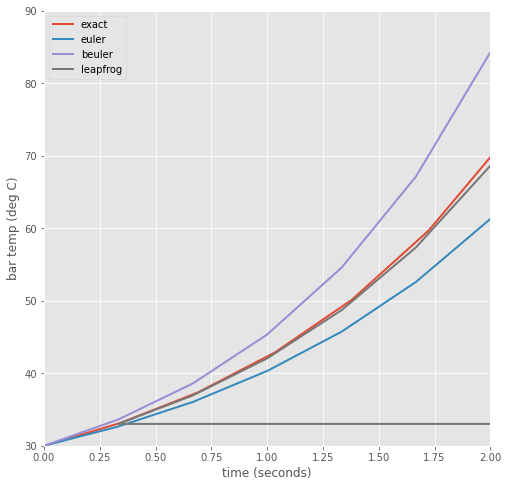

In [1]:
%matplotlib inline
import context
import matplotlib.pyplot as plt
from numlabs.lab2.lab2_functions import euler,beuler,leapfrog
import numpy as np
plt.style.use('ggplot')
#
# save our three functions to a dictionary, keyed by their names
#
theFuncs={'euler':euler,'beuler':beuler,'leapfrog':leapfrog}
#
# store the results in another dictionary
#
output={}
#
#end time = 10 seconds
#
tend=10.
#
# start at 30 degC, air temp of 20 deg C
#
Ta=20.
To=30.
#
# note that lambda is a reserved keyword in python so call this
# thelambda
#
theLambda=0.8  #units have to be per minute if time in seconds
#
# dt = 10/npts = 10/30 = 1/3
#
npts=30
for name,the_fun in theFuncs.items():
    output[name]=the_fun(npts,tend,To,Ta,theLambda)
#
# calculate the exact solution for comparison
#
exactTime=np.linspace(0,tend,npts)
exactTemp=Ta + (To-Ta)*np.exp(theLambda*exactTime)
#
# now plot all four curves
#
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.plot(exactTime,exactTemp,label='exact',lw=2)
for fun_name in output.keys():
    the_time,the_temp=output[fun_name]
    ax.plot(the_time,the_temp,label=fun_name,lw=2)
ax.set_xlim([0,2.])
ax.set_ylim([30.,90.])
ax.grid(True)
ax.set(xlabel='time (seconds)',ylabel='bar temp (deg C)')
out=ax.legend(loc='upper left')

**Figure 1** A plot of the exact and computed solutions for the temperature of a
rock, with parameters: $T_a=20$, $T(0)=30$, $\lambda= +0.8$,
$\Delta t=\frac{1}{3}$

Notice from these results that the centered/leapfrog scheme is the most accurate,
and backward Euler the least accurate.

The next section explains why some schemes are more accurate than
others, and introduces a means to quantify the accuracy of a numerical
approximation.

###  Round-off Error and Discretization Error <a name="Error"></a>

From [Example Accuracy](#ex_accuracy) and the example in the Forward Euler
section of the previous lab,  it is obvious that a numerical
approximation is exactly that - **an approximation**. The process of
discretizing a differential equation inevitably leads to errors. In this
section, we will tackle two fundamental questions related to the
accuracy of a numerical approximation:

-   Where does the error come from (and how can we measure it)?

-   How can the error be controlled?


### Where does the error come from?  

#### Round-off error:

When attempting to solve differential equations on a computer, there are
two main sources of error. The first, *round-off error*, derives from
the fact that a computer can only represent real numbers by *floating
point* approximations, which have only a finite number of digits of
accuracy.

* Mathematical note [floating point notation](#floating-point)


For example, we all know that the number $\pi$ is a non-repeating
decimal, which to the first twenty significant digits is
$3.1415926535897932385\dots$ Imagine a computer which stores only eight
significant digits, so that the value of $\pi$ is rounded to
$3.1415927$.

In many situations, these five digits of accuracy may be sufficient.
However, in some cases, the results can be catastrophic, as shown in the
following example: $$\frac{\pi}{(\pi + 0.00000001)-\pi}.$$ Since the
computer can only “see” 8 significant digits, the addition
$\pi+0.00000001$ is simply equal to $\pi$ as far as the computer is
concerned. Hence, the computed result is $\frac{1}{0}$ - an undefined
expression! The exact answer $100000000\pi$, however, is a very
well-defined non-zero value.

#### Truncation error:

The second source of error stems from the discretization of the problem,
and hence is called *discretization error* or *truncation error*. In
comparison, round-off error is always present, and is independent of the
discretization being used. The simplest and most common way to analyse
the truncation error in a scheme is using *Taylor series expansions*.

Let us begin with the forward difference formula for the first
derivative, , which involves the discrete solution at times $t_{i+1}$
and $t_{i}$. Since only continuous functions can be written as Taylor
series, we expand the exact solution (instead of the discrete values
$T_i$) at the discrete point $t_{i+1}$:

$$T(t_{i+1}) = T(t_i+\Delta t) = T(t_i) + (\Delta t) T^\prime(t_i) + 
  \frac{1}{2}(\Delta t)^2 T^{\prime\prime}(t_i) +\cdots$$

Rewriting to clean this up slightly gives **eq: feuler**

<a name="eq: feuler"></a>
$$\begin{aligned}
T(t_{i+1}) &= T(t_i) + \Delta t T^{\prime}(t_i,T(t_i)) +
  \underbrace{\frac{1}{2}(\Delta t)^2T^{\prime\prime}(t_i) + \cdots}
_{\mbox{ truncation error}} \\ \; 
  &= T(t_i) + \Delta t T^{\prime}(t_i) + {\cal O}(\Delta t^2).
 \end{aligned}$$

This second expression writes the truncation error term in terms of
*order notation*. If we write $y = {\cal O}(\Delta t)$, then we mean
simply that $y < c \cdot \Delta t$ for some constant $c$, and we say that
“ $y$ is first order in $\Delta t$ ” (since it depends on $\Delta t$ to
the first power) or “ $y$ is big-oh of $\Delta t$.” As $\Delta t$ is
assumed small, the next term in the series, $\Delta t^2$ is small
compared to the $\Delta t$ term.  In words, we say that  forward euler is
*first order accurate* with errors of second order.

It is clear from that as $\Delta t$ is reduced in size (as the
computational grid is refined), the error is also reduced. If you
remember that we derived the approximation from the limit definition of
derivative, then this should make sense. This dependence of the error on
powers of the grid spacing $\Delta t$ is an underlying characteristic of
difference approximations, and we will see approximations with higher
orders in the coming sections …

There is one more important distinction to be made here. The “truncation
error” we have been discussing so far is actually what is called *local
truncation error*. It is “local” in the sense that we have expanded the
Taylor series *locally* about the exact solution at the point $t_i$.

There is also a *global truncation error* (or, simply, *global error*),
which is the error made during the course of the entire computation,
from time $t_0$ to time $t_n$. The difference between local and global
truncation error is illustrated in Figure 2.  If the local error stays approximately
constant, then the global error will be approximately the local error times
the number of timesteps, or about one order of $\Delta t$ worse than the local error.

<img src="images/error.png" />

<a name="fig_error"></a>
**Figure Error: ** Local and global truncation error. 

It is easy to get a handle on the order of the local truncation error
using Taylor series, regardless of whether the exact solution is known,
but no similar analysis is available for the global error. We can write

$$\text{global error} = |T(t_n)-T_n|$$

but this expression can only be
evaluated if the exact solution is known ahead of time (which is not the
case in most problems we want to compute, since otherwise we wouldn’t be
computing it in the first place!). Therefore, when we refer to
truncation error, we will always be referring to the local truncation
error.


#### Second order accuracy

Above we mentioned a problem with evaluating the mid-point method. If we start with three points $(t_0,t_1,t_2)$, 
each separated by $\Delta t/2$ so that $t_2 - t_0=\Delta t$

\begin{align}
y(t_2)&=y(t_1) + y^\prime (t_1,y(t_1))(t_2 - t_1) + \frac{y^{\prime \prime}(t_1,y(t_1))}{2} (t_2 - t_1)^2 + \frac{y^{\prime \prime \prime}(t_1,y(t_1))}{6} (t_2 - t_1)^3 + h.o.t. \ (eq.\ a)\\
y(t_0)&=y(t_1) + y^\prime (t_1,y(t_1))(t_0 - t_1) + \frac{y^{\prime \prime}(t_1)}{2} (t_0 - t_1)^2 + \frac{y^{\prime \prime \prime}(t_1)}{6} (t_0 - t_1)^3 + h.o.t. \ (eq.\ b)
\end{align}


where h.o.t.  stands for "higher order terms".  Rewriting in terms of $\Delta t$:


\begin{align}
y(t_2)&=y(t_1) + \frac{\Delta t}{2}y^\prime (t_1,y(t_1)) + \frac{\Delta t^2}{8} y^{\prime \prime}(t_1,y(t_1)) + \frac{\Delta t^3}{48} y^{\prime \prime \prime}(t_1,y(t_1)) + h.o.t. \ (eq.\ a)\\
y(t_0)&=y(t_1) - \frac{\Delta t}{2}y^\prime (t_1,y(t_1)) + \frac{\Delta t^2}{8} y^{\prime \prime}(t_1,y(t_1)) - \frac{\Delta t^3}{48} y^{\prime \prime \prime}(t_1,y(t_1)) + h.o.t. \ (eq.\ b)
\end{align}


and subtracting:

\begin{align}
y(t_2)&=y(t_0) + \Delta t y^\prime (t_1,y(t_1))  + \frac{\Delta t^3}{24} y^{\prime \prime \prime}(t_1,y(t_1)) + h.o.t. \ (eq.\ c)
\end{align}

where $t_1=t_0 + \Delta t/2$

Comparing with [eq: feuler](#eq: feuler) we can see that we've canceled the $\Delta t^2$ terms, so that
if we drop the $\frac{\Delta t^3}{24} y^{\prime \prime \prime}(t_1,y(t_1))$
and higher order terms we're doing one order better that foward euler, as long as we can solve the problem of
estimating y at the midpoint: $y(t_1) = y(t_0 + \Delta t/2)$



#### mid-point and leapfrog

The mid-point and leapfrog methods take two slightly different approaches to estimating $y(t_0 + \Delta t/2)$.  
For the [explicit mid-point method](https://en.wikipedia.org/wiki/Midpoint_method), we estimate $y$ at
the midpoint by taking a half-step:


\begin{align}
k_1 & = \Delta t y^\prime(t_0,y(t_0)) \\
k_2 & = \Delta t y^\prime(t_0 + \Delta t/2,y(t_0) + k_1/2) \\
y(t_0 + \Delta t) &= y(t_0) + k_2
\end{align}


Compare this to the [leapfrog method](https://en.wikipedia.org/wiki/Leapfrog_integration), which uses the results
from one half-interval to calculate the results for the next half-interval:


\begin{align}
y(t_0 + \Delta t/2)  & = y(t_0) + \frac{\Delta t}{2} y^\prime(t_0,y(t_0))\ (i) \\
y(t_0 + \Delta t) & = y(t_0) + \Delta t y^\prime(t_0 + \Delta t/2,y(t_0 + \Delta t/2)\ (ii)\\
y(t_0 + 3 \Delta t/2)  & = y(t_0 + \Delta t/2) + \Delta t y^\prime(t_0 + \Delta t,y(t_0 + \Delta t))\ (iii) \\
y(t_0 + 2 \Delta t)  & = y(t_0 + \Delta t) + \Delta t y^\prime(t_0 + 3\Delta t/2,y(t_0 + 3 \Delta t/2))\ (iv) \\
\end{align}


Comparing (iii) and (iv) shows how the method gets its name: the half-interval and whole interval values
are calculated by leaping over each other.  Once the first half and whole steps are done, the rest of the
integration is completed by repeating (iii) and (iv) as until the endpoint is reached.

The leapfrog scheme has the advantage that it is *time reversible* or as the Wikipedia article says *sympletic*. 
This means that estimating $y(t_1)$ and then using that value to go backwards by $-\Delta t$ yields $y(t_0)$
exactly, which the mid-point method does not.  The mid-point method, however, is one member (the 2nd order member)
of a family of *Runge Kutta* integrators, which will be covered in more detail in Lab 4.




<div id="Problem-Error" />

### Problem Error  -- hand-in png file or paper

-   a\) Derive the error term for the backward difference formula using
    Taylor series, and hence show that it is also first order.

-   b\) How does the constant in front of the leading order error term differ
    from that for the forward difference formula? Relate this back to the
    results plotted in [Figure error](#fig_error), where these two formulae
    were used to derive difference schemes for the heat conduction problem.  (i.e., explain why
    backward euler is an overestimate and forward euler is an underestimate of the exact
    solution)


### How can we control the error? <a name="Error-Control"></a>

Now that we’ve determined the source of the error in numerical methods,
we would like to find a way to control it; that is, we would like to be
able to compute and be confident that our approximate solution is
“close” to the exact solution. Round-off error is intrinsic to all
numerical computations, and cannot be controlled (except to develop
methods that do not magnify the error unduly … more on this later).
Truncation error, on the other hand, *is* under our control.

In the simple ODE examples that we’re dealing with in this lab, the
round-off error in a calculation is much smaller than the truncation
error. Furthermore, the schemes being used are *stable with respect to
round-off error* in the sense that round-off errors are not magnified in
the course of a computation. So, we will restrict our discussion of
error control in what follows to the truncation error.

However, there are many numerical algorithms in which the round-off
error can dominate the the result of a computation (Gaussian elimination
is one example, which you will see in Lab \#3 ), and so we must always
keep it in mind when doing numerical computations.

There are two fundamental ways in which the truncation error in an
approximation  can be reduced:

1.  Decrease the grid spacing, . Provided that the second derivative of
    the solution is bounded, it is clear from the error term in  that as
      is reduced, the error will also get smaller. This principle was
    demonstrated in an example from Lab \#1. The disadvantage to
    decreasing  is that the cost of the computation increases since more
    steps must be taken. Also, there is a limit to how small  can be,
    beyond which round-off errors will start polluting the computation.

2.  Increase the order of the approximation. We saw above that the
    forward difference approximation of the first derivative is first
    order accurate in the grid spacing. It is also possible to derive
    higher order difference formulas which have a leading error term of
    the form $(\Delta t)^p$, with $p>1$. As noted above in [Section Second Order](#sec_secondOrder)
    in  the midpoint formula
    is a second order scheme, and some further examples will be given in
    [Section Higher order Taylor](#sec_HigherOrderTaylor). The main disadvantage to using
    very high order schemes is that the error term depends on higher
    derivatives of the solution, which can sometimes be very large – in
    this case, the stability of the scheme can be adversely affected
    (for more on this, see [Section Stability](#sec_stability).



 <div id="Problem-Accuracy" />
 
### Problem Accuracy: hand in as part of a jupyter notebook

In order to investigate these two approaches to
improving the accuracy of an approximation, you can use the code in
[terror.py](https://github.com/rhwhite/numeric_students/blob/downloads/numlabs/lab2/terror2.ipynb)
to play with the solutions to the heat
conduction equation. For a given function $\lambda(T)$, and specified
parameter values, you should experiment with various time steps and
schemes, and compare the computed results (Note: only the answers to the
assigned questions need to be handed in). Look at the different schemes
(euler, leapfrog, midpoint, 4th order runge kutta) run them for various total
times (tend) and step sizes (dt=tend/npts).

The three schemes that will be used here are forward Euler (first
order), leap frog (second order) and the fourth order Runge-Kutta scheme
(which will be introduced in Lab 4).

To hand in: Try three different step sizes for all three schemes for a
total of 9 runs. It’s helpful to be able to change the axis limits to
look at various parts of the plot.

Use your 9 results to answer parts a and b below. (The leap-frog scheme
should give you quasi-pathological results, see the explanation at the
end of section 5)

-   a\) Does increasing the order of the scheme, or decreasing the time step
    always improve the solution?

-   b\) How would you compute the local truncation error from the error plot?
    And the global error? Do this on a plot for one set of parameters.

-   c\) Similarly, how might you estimate the *order* of the local truncation
    error? The order of the global error? ( **Hint:** An order $p$ scheme
    has truncation error that looks like $c\cdot(\Delta t)^p$. Read the
    error off the plots for several values of the grid spacing and use this
    to find $p$.) Are the local and global error significantly different?
    Why or why not?

### Other Approximations to the First Derivative <a name="Other-Approx"></a>

The Taylor series method of deriving difference formulae for the first
derivative is the simplest, and can be used to obtain approximations
with even higher order than two. There are also many other ways to
discretize the derivatives appearing in ODE’s, as shown in the following
sections…

#### Higher Order Taylor Methods <a name="sec_HigherOrderTaylor"></a>

As mentioned earlier, there are many other possible approximations to
the first derivative using the Taylor series approach. The basic
approach in these methods is as follows:

1.  expand the solution in a Taylor series at one or more points
    surrounding the point where the derivative is to be approximated
    (for example, for the centered scheme, you used two points,
    $T(t_i+\Delta t)$ and $T(t_i-\Delta t)$. You also have to make sure that you
    expand the series to a high enough order …

2.  take combinations of the equations until the $T_i$ (and possibly
    some other derivative) terms are eliminated, and all you’re left
    with is the first derivative term.

One example is the fourth-order centered difference formula for the
first derivative:
$$\frac{-T(t_{i+2})+8T(t_{i+1})-8T(t_{i-1})+T(t_{i-2})}{12\Delta t} =
  T^\prime(t_i) + {\cal O}((\Delta t)^4)$$

**Quiz:** Try the quiz at [this
link](https://phaustin.github.io/numeric/quizzes2/order.html)
related to this higher order scheme.

#### Predictor-Corrector Methods 

Another class of discretizations are called *predictor-corrector
methods*. Implicit methods can be difficult or expensive to use because
of the solution step, and so they are seldom used to integrate ODE’s.
Rather, they are often used as the basis for predictor-corrector
algorithms, in which a “prediction” for $T_{i+1}$ based only on an
explicit method is then “corrected” to give a better value by using this
precision in an implicit method.

To see the basic idea behind these methods, let’s go back (once again)
to the backward Euler method for the heat conduction problem which
reads:
$$T_{i+1} = T_{i} + \Delta t \, \lambda( T_{i+1}, t_{i+1} ) \, ( T_{i+1}
- T_a ).$$ Note that after applying the backward difference formula ,
all terms in the right hand side are evaluated at time $t_{i+1}$.

Now, $T_{i+1}$ is defined implicitly in terms of itself, and unless
$\lambda$ is a very simple function, it may be very difficult to solve
this equation for the value of $T$ at each time step. One alternative,
mentioned already, is the use of a non-linear equation solver such as
Newton’s method to solve this equation. However, this is an iterative
scheme, and can lead to a lot of extra expense. A cheaper alternative is
to realize that we could try estimating or *predicting* the value of
$T_{i+1}$ using the simple explicit forward Euler formula and then use
this in the right hand side, to obtain a *corrected* value of $T_{i+1}$.
The resulting scheme, $$\begin{array}{ll}
  \mathbf{Prediction}: & \widetilde{T}_{i+1} = T_i + \Delta t \,
  \lambda(T_i,t_i) \, (T_i-T_a), \\ \; \\
  \mathbf{Correction}: & T_{i+1} = T_i + \Delta t \,
  \lambda(\widetilde{T}_{i+1},t_{i+1}) \, (\widetilde{T}_{i+1}-T_a).
\end{array}$$

This method is an explicit scheme, which can also be shown to be second
order accurate in . It is the simplest in a whole class of schemes
called *predictor-corrector schemes* (more information is available on
these methods in a numerical analysis book such as  @burden-faires).

#### Other Methods 

The choice of methods is made even greater by two other classes of
schemes:

 **Runge-Kutta methods:**

We have already seen two examples of the Runge-Kutta family of integrators:  Forward Euler is
    a first order Runge-Kutta, and the midpoint method is second order Runge-Kutta.  Fourth
    and fifth order Runge-Kutta algorithms
    which will be described in Labs #4 and #5

 **Multi-step methods:**

which use values of the solution at more than one previous time step
    in order to increase the accuracy. Compare these to one-step
    schemes, such as forward Euler, which use the solution only at one
    previous step.

More can be found on these (and other) methods in  Burden and Faires and Newman.

### Accuracy Summary<a name="Summary-Accuracy"></a>

In this section, you’ve been given a short overview of the accuracy of
difference schemes for first order ordinary differential equations.
We’ve seen that accuracy can be improved by either decreasing the grid
spacing, or by choosing a higher order scheme from one of several
classes of methods. When using a higher order scheme, it is important to
realize that the cost of the computation usually rises due to an added
number of function evaluations (especially for multi-step and
Runge-Kutta methods). When selecting a numerical scheme, it is important
to keep in mind this trade-off between accuracy and cost.

However, there is another important aspect of discretization that we
have pretty much ignored. The next section will take a look at schemes
of various orders from a different light, namely that of *stability*.

## Stability of Difference Approximations

The easiest way to introduce the concept of stability is for you to see
it yourself.



<div id="Problem-Stability" />

### Problem Stability  -- hand in as part of a jupyter notebook

This example is a slight modification of
[Problem accuracy](#Problem-Accuracy) from the previous section on accuracy. We
will add one scheme (backward euler) and drop the 4th order Runge-Kutta,
and change the focus from error to stability. The value of $\lambda$ is
assumed a constant, so that the backward Euler scheme results in an
explicit method, and we’ll also compute a bit further in time, so that
any instability manifests itself more clearly. Run the 
[stability2.py](https://github.com/phaustin/numeric/blob/master/numlabs/lab2/stability2.py) script in ipython or the notebook with $\lambda= -8\ s^{-1}$, with $\Delta t$ values
that just straddle the stability condition for the forward euler scheme
($\Delta t < \frac{-2}{\lambda}$, derived below). Hand in plots with
comments that show that 1) the stability condition does in fact predict
the onset of the instablity in the euler scheme, and 2) the backward
euler and leapfrog are either stable or unstable for the same $\Delta t$
values. (you should run out to longer than tend=10 seconds to see if
there is a delayed instability.)

The heat conduction problem, as you saw in Lab \#1, has solutions that
are stable when $\lambda<0$. It is clear from
[Problem stability](#Problem-Stability) above that some higher order schemes
(namely, the leap-frog scheme) introduce a spurious oscillation not
present in the continuous solution. This is called a *computational* or
*numerical instability*, because it is an artifact of the discretization
process only. This instability is not a characteristic of the heat
conduction problem alone, but is present in other problems where such
schemes are used. Furthermore, as we will see below, even a scheme such
as forward Euler can be unstable for certain problems and choices of the
time step.

There is a way to determine the stability properties of a scheme, and
that is to apply the scheme to the *test equation*
$$\frac{dz}{dt} = \lambda z$$ where
$\lambda$ is a complex constant.

The reason for using this equation may not seem very clear. But if you
think in terms of $\lambda z$ as being the linearization of some more
complex right hand side, then the solution to is $z=e^{\lambda t}$, and
so $z$ represents, in some sense, a Fourier mode of the solution to the
linearized ODE problem. We expect that the behaviour of the simpler,
linearized problem should mimic that of the original problem.

Applying the forward Euler scheme to this test equation, results in the
following difference formula $$z_{i+1} = z_i+(\lambda \Delta t)z_i$$
which is a formula that we can apply iteratively to $z_i$ to obtain
$$\begin{aligned}
z_{i+1} &=& (1+\lambda \Delta t)z_{i} \\
        &=& (1+\lambda \Delta t)^2 z_{i-1} \\
        &=& \cdots \\
        &=& (1+\lambda \Delta t)^{i+1} z_{0}.\end{aligned}$$ The value
of $z_0$ is fixed by the initial conditions, and so this difference
equation for $z_{i+1}$ will “blow up” as $i$ gets bigger, if the factor
in front of $z_0$ is greater than 1 in magnitude – this is a sign of
instability. Hence, this analysis has led us to the conclusion that if
$$|1+\lambda\Delta t| < 1,$$ then the forward Euler method is stable.
For *real* values of $\lambda<0$, this inequality can be shown to be
equivalent to the *stability condition*
$$\Delta t < \frac{-2}{\lambda},$$ which is a restriction on how large
the time step can be so that the numerical solution is stable.



<div id="Problem-Backward-Euler" />

### Problem Backward Euler -- hand in png file or paper

Perform a similar analysis for the
backward Euler formula, and show that it is *always stable* when
$\lambda$ is real and negative.

#### Example: leap-frog

*Now, what about the leap frog scheme?*

Applying the test equation to the leap frog scheme results in the
difference equation $$z_{i+1} = z_{i-1} + 2 \lambda \Delta t z_i.$$
Difference formulas such as this one are typically solved by looking for
a solution of the form $z_i = w^i$ which, when substituted into this
equation, yields $$w^2 - 2\lambda\Delta t w - 1 = 0,$$ a quadratic
equation with solution
$$w = \lambda \Delta t \left[ 1 \pm \sqrt{1+\frac{1}{(\lambda
        \Delta t)^2}} \right].$$ The solution to the original difference
equation, $z_i=w^i$ is stable only if all solutions to this quadratic
satisfy $|w|<1$, since otherwise, $z_i$ will blow up as $i$ gets large.

The mathematical details are not important here – what is important is
that there are two (possibly complex) roots to the quadratic equation
for $w$, and one is *always* greater than 1 in magnitude *unless*
$\lambda$ is pure imaginary ( has real part equal to zero), *and*
$|\lambda \Delta t|<1$. For the heat conduction equation in
[Problem Stability](#prob_stability) (which is already of the same form as the
test equation ), $\lambda$ is clearly not imaginary, which explains the
presence of the instability for the leap-frog scheme.

Nevertheless, the leap frog scheme is still useful for computations. In
fact, it is often used in geophysical applications, as you will see
later on when discretizing , and .

An example of where the leap frog scheme is superior to the other first
order schemes is for undamped periodic motion (which arose in the
weather balloon example from Lab \#1 ). This corresponds to the system
of ordinary differential equations (with the damping parameter, $\beta$,
taken to be zero): $$\frac{dy}{dt} = u,$$
$$\frac{du}{dt} = - \frac{\gamma}{m} y.$$ You’ve already discretized
this problem using the forward difference formula, and the same can be
done with the second order centered formula. We can then compare the
forward Euler and leap-frog schemes applied to this problem.  We code this
in the module

Solution plots are given in [Figure oscilator](#fig_oscillator), for
parameters $\gamma/m=1$, $\Delta t=0.25$, $y(0)=0.0$ and $u(0)=1.0$, and
demonstrate that the leap-frog scheme is stable, while forward Euler is
unstable. This can easily be explained in terms of the stability
criteria we derived for the two schemes when applied to the test
equation. The undamped oscillator problem is a linear problem with pure
imaginary eigenvalues, so as long as $|\sqrt{\gamma/m}\Delta t|<1$, the
leap frog scheme is stable, which is obviously true for the parameter
values we are given. Furthermore, the forward Euler stability condition
$|1+\lambda\Delta
  t|<1$ is violated for any choice of time step (when $\lambda$ is pure
imaginary) and so this scheme is always unstable for the undamped
oscillator.  The github link to the oscillator module is [oscillator.py](https://github.com/phaustin/numeric/blob/master/numlabs/lab2/oscillator.py)

<a name="fig_oscillator"></a>

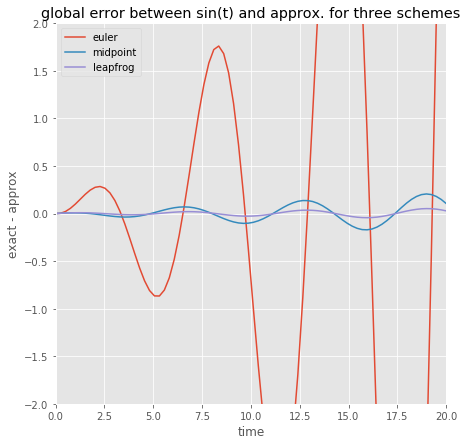

In [2]:
import numlabs.lab2.oscillator as os
the_times=np.linspace(0,20.,80)
yvec_init=[0,1]
output_euler=os.euler(the_times,yvec_init)
output_mid=os.midpoint(the_times,yvec_init)
output_leap=os.leapfrog(the_times,yvec_init)
answer=np.sin(the_times)
plt.style.use('ggplot')
fig,ax=plt.subplots(1,1,figsize=(7,7))
ax.plot(the_times,(output_euler[0,:]-answer),label='euler')
ax.plot(the_times,(output_mid[0,:]-answer),label='midpoint')
ax.plot(the_times,(output_leap[0,:]-answer),label='leapfrog')
ax.set(ylim=[-2,2],xlim=[0,20],title='global error between sin(t) and approx. for three schemes',
      xlabel='time',ylabel='exact - approx')
ax.legend(loc='best');

**Figure numerical**: Numerical solution to the undamped harmonic oscillator problem, using
the forward Euler and leap-frog schemes. Parameter values:
$\gamma / m=1.0$, $\Delta t=0.25$, $y(0)=0$, $u(0)=1.0$. The exact
solution is a sinusoidal wave.

Had we taken a larger time step (such as $\Delta t=2.0$, for example),
then even the leap-frog scheme is unstable. Furthermore, if we add
damping ($\beta\neq 0$), then the eigenvalues are no longer pure
imaginary, and the leap frog scheme is unstable no matter what time step
we use.

## Stiff Equations 

One final note: this Lab has dealt only with ODE’s (and systems of
ODE’s) that are *non-stiff*. *Stiff equations* are equations that have
solutions with at least two widely varying times scales over which the
solution changes. An example of stiff solution behaviour is a problem
with solutions that have rapid, transitory oscillations, which die out
over a short time scale, after which the solution slowly decays to an
equilibrium. A small time step is required in the initial transitory
region in order to capture the rapid oscillations. However, a larger
time step can be taken in the non-oscillatory region where the solution
is smoother. Hence, using a very small time step will result in very
slow and inefficient computations.

There are also many other numerical schemes designed specifically for
stiff equations, most of which are implicit schemes. We will not
describe any of them here – you can find more information in a numerical
analysis text such as  @burden-faires.

## Difference Approximations of Higher Derivatives

Higher derivatives can be discretized in a similar way to what we did
for first derivatives. Let’s consider for now only the second
derivative, for which one possible approximation is the second order
centered formula: $$\frac{y(t_{i+1})-2y(t_i)+y(t_{i-1})}{(\Delta t)^2} = 
  y^{\prime\prime}(t_i) + {\cal O}((\Delta t)^2),$$ There are, of course,
many other possible formulae that we might use, but this is the most
commonly used.

<div id="Problem-Taylor" />

### Problem Taylor:  Hand in png file or paper

-   a) Use Taylor series to derive this formula.

-   b) Derive a higher order approximation.

## Summary 

This lab has discussed the accuracy and stability of difference schemes
for simple first order ODEs. The results of the problems should have
made it clear to you that choosing an accurate and stable discretization
for even a very simple problem is not straightforward. One must take
into account not only the considerations of accuracy and stability, but
also the cost or complexity of the scheme. Selecting a numerical method
for a given problem can be considered as an art in itself.
     

## Mathematical Notes

### Taylor Polynomials and Taylor Series


Taylor Series are of fundamental importance in numerical analysis. They
are the most basic tool for talking about the approximation of
functions. Consider a function $f(x)$ that is smooth – when we say
“smooth”, what we mean is that its derivatives exist and are bounded
(for the following discussion, we need $f$ to have $(n+1)$ derivatives).
We would like to approximate $f(x)$ near the point $x=x_0$, and we can
do it as follows:
$$f(x) = \underbrace{P_n(x)}_{\mbox{Taylor polynomial}} +
  \underbrace{R_n(x)}_{\mbox{remainder term}},$$ where
$$P_n(x)=f(x_0)+ f^\prime(x_0)(x-x_0) +
  \frac{f^{\prime\prime}(x_0)}{2!}(x-x_0)^2 + \cdots + 
  \frac{f^{(n)}(x_0)}{n!}(x-x_0)^n$$ is the *$n$th order Taylor
polynomial* of $f$ about $x_0$, and
$$R_n(x)=\frac{f^{(n+1)}(\xi(x))}{(n+1)!}(x-x_0)^{n+1}$$ is the
*remainder term* or *truncation error*. The point $\xi(x)$ in the error
term lies somewhere between the points $x_0$ and $x$. If we look at the
infinite sum ( let $n\rightarrow\infty$), then the resulting infinite
sum is called the *Taylor series of $f(x)$ about $x=x_0$*. This result
is also know as *Taylor’s Theorem*.

Remember that we assumed that $f(x)$ is smooth (in particular, that its
derivatives up to order $(n+1)$ exist and are finite). That means that
all of the derivatives appearing in $P_n$ and $R_n$ are bounded.
Therefore, there are two ways in which we can think of the Taylor
polynomial $P_n(x)$ as an approximation of $f(x)$:

1.  First of all, let us fix $n$. Then, we can improve the approximation
    by letting $x$ approach $x_0$, since as $(x-x_0)$ gets small, the
    error term $R_n(x)$ goes to zero ($n$ is considered fixed and all
    terms depending on $n$ are thus constant). Therefore, the
    approximation improves when $x$ gets closer and closer to $x_0$.

2.  Alternatively, we can think of fixing $x$. Then, we can improve the
    approximation by taking more and more terms in the series. When $n$
    is increased, the factorial in the denominator of the error term
    will eventually dominate the $(x-x_0)^{n+1}$ term (regardless of how
    big $(x-x_0)$ is), and thus drive the error to zero.

In summary, we have two ways of improving the Taylor polynomial
approximation to a function: by evaluating it at points closer to the
point $x_0$; and by taking more terms in the series.

This latter property of the Taylor expansion can be seen by a simple example.
Consider the Taylor polynomial for the function $f(x)=\sin(x)$ about the
point $x_0=0$. All of the even terms are zero since they involve $sin(0)$, 
so that if we take $n$
odd ( $n=2k+1$), then the $n$th order Taylor polynomial for $sin(x)$ is

$$P_{2k+1}(x)=x - \frac{x^3}{3!}+\frac{x^5}{5!} -\frac{x^7}{7!}+\cdots
    +\frac{x^{2k+1}}{(2k+1)!}.\ eq: taylor$$

The plot in Figure: Taylor illustrates quite clearly
how the approximation improves both as $x$ approaches 0, and as $n$ is
increased.

(We'll go over [sin_taylor.py](https://github.com/phaustin/numeric/blob/master/numlabs/lab2/taylor_sin.py), the
python module that generated Figure: Taylor in class)

<img src="images/taylor.png" width="60%" />

Figure: Taylor -- Plot of $\sin(x)$ compared to its Taylor polynomial approximations
about $x_0=0$, for various values of $n=2k +1$ in eq: taylor.

Consider a specific Taylor polynomial, say $P_3(x)$ ( fix $n=3$). Notice
that for $x$ far away from the origin, the polynomial is nowhere near
the function $\sin(x)$. However, it approximates the function quite well
near the origin. On the other hand, we could take a specific point,
$x=5$, and notice that the Taylor series of orders 1 through 7 do not
approximate the function very well at all. Nevertheless the
approximation improves as $n$ increases, as is shown by the 15th order
Taylor polynomial.

### Floating Point Representation of Numbers

Unlike a mathematician, who can deal with real numbers having infinite
precision, a computer can represent numbers with only a finite number of
digits. The best way to understand how a computer stores a number is to
look at its *floating-point form*, in which a number is written as
$$\pm 0.d_1 d_2 d_3 \ldots d_k \times 10^n,$$ where each digit, $d_i$ is
between 0 and 9 (except $d_1$, which must be non-zero). Floating point
form is commonly used in the physical sciences to represent numerical
values; for example, the Earth’s radius is approximately 6,400,000
metres, which is more conveniently written in floating point form as
$0.64\times 10^7$ (compare this to the general form above).

Computers actually store numbers in *binary form* (i.e. in base-2
floating point form, as compared to the decimal or base-10 form shown
above). However, it is more convenient to use the decimal form in order
to illustrate the basic idea of computer arithmetic. For a good
discussion of the binary representation of numbers, see Burden & Faires
 [sec. 1.2] or Newman section 4.2.

For the remainder of this discussion, assume that we’re dealing with a
computer that can store numbers with up to 8 *significant digits*
(i.e. $k=8$) and exponents in the range $-38 \leq n \leq 38$. Based on
these values, we can make a few observations regarding the numbers that
can be represented:

-   The largest number that can be represented is about $1.0\times
      10^{+38}$, while the smallest is $1.0\times 10^{-38}$.

-   These numbers have a lot of *holes*, where real numbers are missed.
    For example, consider the two consecutive floating point numbers
    $$0.13391482 \times 10^5 \;\;\; {\rm and} \;\;\; 0.13391483 \times 10^5,$$
    or 13391.482 and 13391.483. Our floating-point number system cannot
    represent any numbers between these two values, and hence any number
    in between 13391.482 and 13391.483 must be approximated by one of
    the two values. Another way of thinking of this is to observe that
    $0.13391482 \times 10^5$ does not represent just a single real
    number, but a whole *range* of numbers.

-   Notice that the same amount of floating-point numbers can be
    represented between $10^{-6}$ and $10^{-5}$ as are between $10^{20}$
    and $10^{21}$. Consequently, the density of floating points numbers
    increases as their magnitude becomes smaller. That is, there are
    more floating-point numbers close to zero than there are far away.
    This is illustrated in the figure below.

    The floating-point numbers (each represented by a $\times$) are
    more dense near the origin.
    
    

<img src="images/float1.png" />

The values $k=8$ and $-38\leq n \leq 38$ correspond to what is known as
*single precision arithmetic*, in which 4 bytes (or units of memory in a
computer) are used to store each number. It is typical in many
programming languages, including $C++$, to allow the use of higher
precision, or *double precision*, using 8 bytes for each number,
corresponding to values of $k=16$ and $-308\leq n \leq 308$, thereby
greatly increasing the range and density of numbers that can be
represented. When doing numerical computations, it is customary to use
double-precision arithmetic, in order to minimize the effects of
round-off error (in a $C++$ program, you can define a variable ` x` to
be double precision using the declaration ` double x;`).

Sometimes, double precision arithmetic may help in eliminating round-off
error problems in a computation. On the minus side, double precision
numbers require more storage than their single precision counterparts,
and it is sometimes (but not always) more costly to compute in double
precision. Ultimately, though, using double precision should not be
expected to be a cure-all against the difficulties of round-off errors.
The best approach is to use an algorithm that is not unstable with
respect to round-off error. For an example where increasing precision
will not help, see the section on Gaussian elimination in Lab \#3.